<a href="https://colab.research.google.com/github/dhivyashree93s/FSWDEXP3/blob/main/activity3%264nndl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import sklearn

print("NumPy:", np.__version__)
print("TensorFlow:", tf.__version__)
print("Pandas:", pd.__version__)
print("Sklearn:", sklearn.__version__)


NumPy: 2.0.2
TensorFlow: 2.19.0
Pandas: 2.2.2
Sklearn: 1.6.1


Actual Scores: [40, 65]
Predicted Scores: [np.float64(42.7), np.float64(64.89999999999999)]
Model Coefficient: [5.55]
Mean Squared Error: 3.6500000000000083


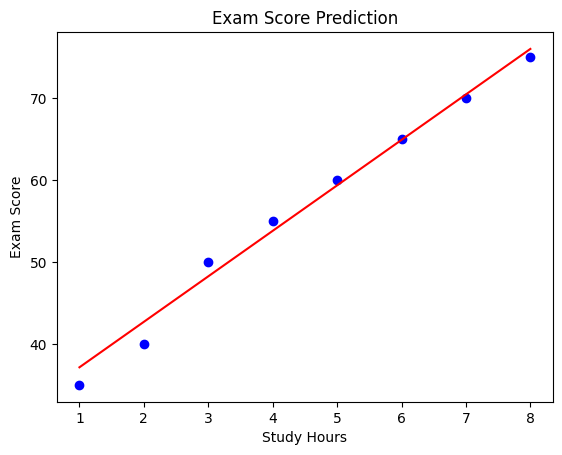

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dataset: Study hours vs Exam score
data = {
    "study_hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "exam_score": [35, 40, 50, 55, 60, 65, 70, 75]
}
df = pd.DataFrame(data)

# Split data
X = df[["study_hours"]]
y = df["exam_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Output
print("Actual Scores:", list(y_test))
print("Predicted Scores:", list(y_pred))
print("Model Coefficient:", model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Exam Score Prediction")
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# ----------------------------
# PARAMETERS
# ----------------------------
vocab_size = 5000       # smaller vocab
max_length = 100        # shorter sequences
num_samples = 2000      # take only 2000 reviews for training/testing

# ----------------------------
# LOAD DATA
# ----------------------------
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Take only small subset
X_train = X_train[:num_samples]
y_train = y_train[:num_samples]
X_test = X_test[:500]    # small test set
y_test = y_test[:500]

# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# ----------------------------
# BUILD MODEL
# ----------------------------
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_length))  # smaller embedding
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ----------------------------
# TRAIN MODEL
# ----------------------------
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2, verbose=1)

# ----------------------------
# EVALUATE
# ----------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# ----------------------------
# MAKE SAMPLE PREDICTIONS
# ----------------------------
sample_reviews = X_test[:5]  # first 5 reviews
predictions = model.predict(sample_reviews)

for i, pred in enumerate(predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review {i+1} Prediction: {sentiment} ({pred[0]:.2f})")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5098 - loss: 0.6926 - val_accuracy: 0.5675 - val_loss: 0.6891
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6787 - loss: 0.6654 - val_accuracy: 0.7075 - val_loss: 0.5705
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8142 - loss: 0.4421 - val_accuracy: 0.7325 - val_loss: 0.5202
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7428 - loss: 0.5234
Test Accuracy: 0.7440000176429749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
Review 1 Prediction: Positive (0.76)
Review 2 Prediction: Positive (0.69)
Review 3 Prediction: Positive (0.53)
Review 4 Prediction: Positive (0.58)
Review 5 Prediction: Positive (0.98)
